<a href="https://colab.research.google.com/github/jrobak94/Data_Science/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – Analyzing Transaction Data

### Joseph Robak, Deep Dive 10/7/24


# Problem Definition:
Our goal for this project, is to identify correlation between the probability of making a transaction and unknown variables using Gaussian Naive Bayes models. With this we should be able to determine the most significant factors for a customer to make a purchase. Without our variables labeled, we have to rely on analytical tools to determine correlation.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data Collection/Sources


In [2]:
transaction_data = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv"
td = pd.read_csv(transaction_data)
td.head()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [3]:
td.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [4]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [5]:
td.shape

(180000, 53)

In [6]:
td.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,89999.500000,51961.668564,0.0000,44999.750000,89999.50000,134999.250000,179999.0000
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480


# Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [7]:
td.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
td.isna().sum().sum()

0

In [9]:
ctd = td.copy()  # Make a copy of our dataframe before we transform anything

ctd = ctd.convert_dtypes(convert_floating=True) # our database needs to recognize our numbers as floating points instead of strings

In [10]:
ctd.drop("Unnamed: 0", axis = 1, inplace = True) # Dropping our Columns labeling each training set with no additional information
ctd.drop("ID_code", axis = 1, inplace = True)

In [11]:
ctd.info() # Double-Checking we dropped the unnecessary columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  Int64  
 1   var_0   180000 non-null  Float64
 2   var_1   180000 non-null  Float64
 3   var_2   180000 non-null  Float64
 4   var_3   180000 non-null  Float64
 5   var_4   180000 non-null  Float64
 6   var_5   180000 non-null  Float64
 7   var_6   180000 non-null  Float64
 8   var_7   180000 non-null  Float64
 9   var_8   180000 non-null  Float64
 10  var_9   180000 non-null  Float64
 11  var_10  180000 non-null  Float64
 12  var_11  180000 non-null  Float64
 13  var_12  180000 non-null  Float64
 14  var_13  180000 non-null  Float64
 15  var_14  180000 non-null  Float64
 16  var_15  180000 non-null  Float64
 17  var_16  180000 non-null  Float64
 18  var_17  180000 non-null  Float64
 19  var_18  180000 non-null  Float64
 20  var_19  180000 non-null  Float64
 21  var_20  18

Looks like we don't have to worry about any null values for data cleaning, and no variables stood out as not being useful. Only thing we had to clean was to drop the ID-Code and Unnamed column since they were duplicate data.

# Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

1. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.





Here we see the distribution of each variable is close to Gaussian, some positive or negative skews, but in general they have a normal distribution.

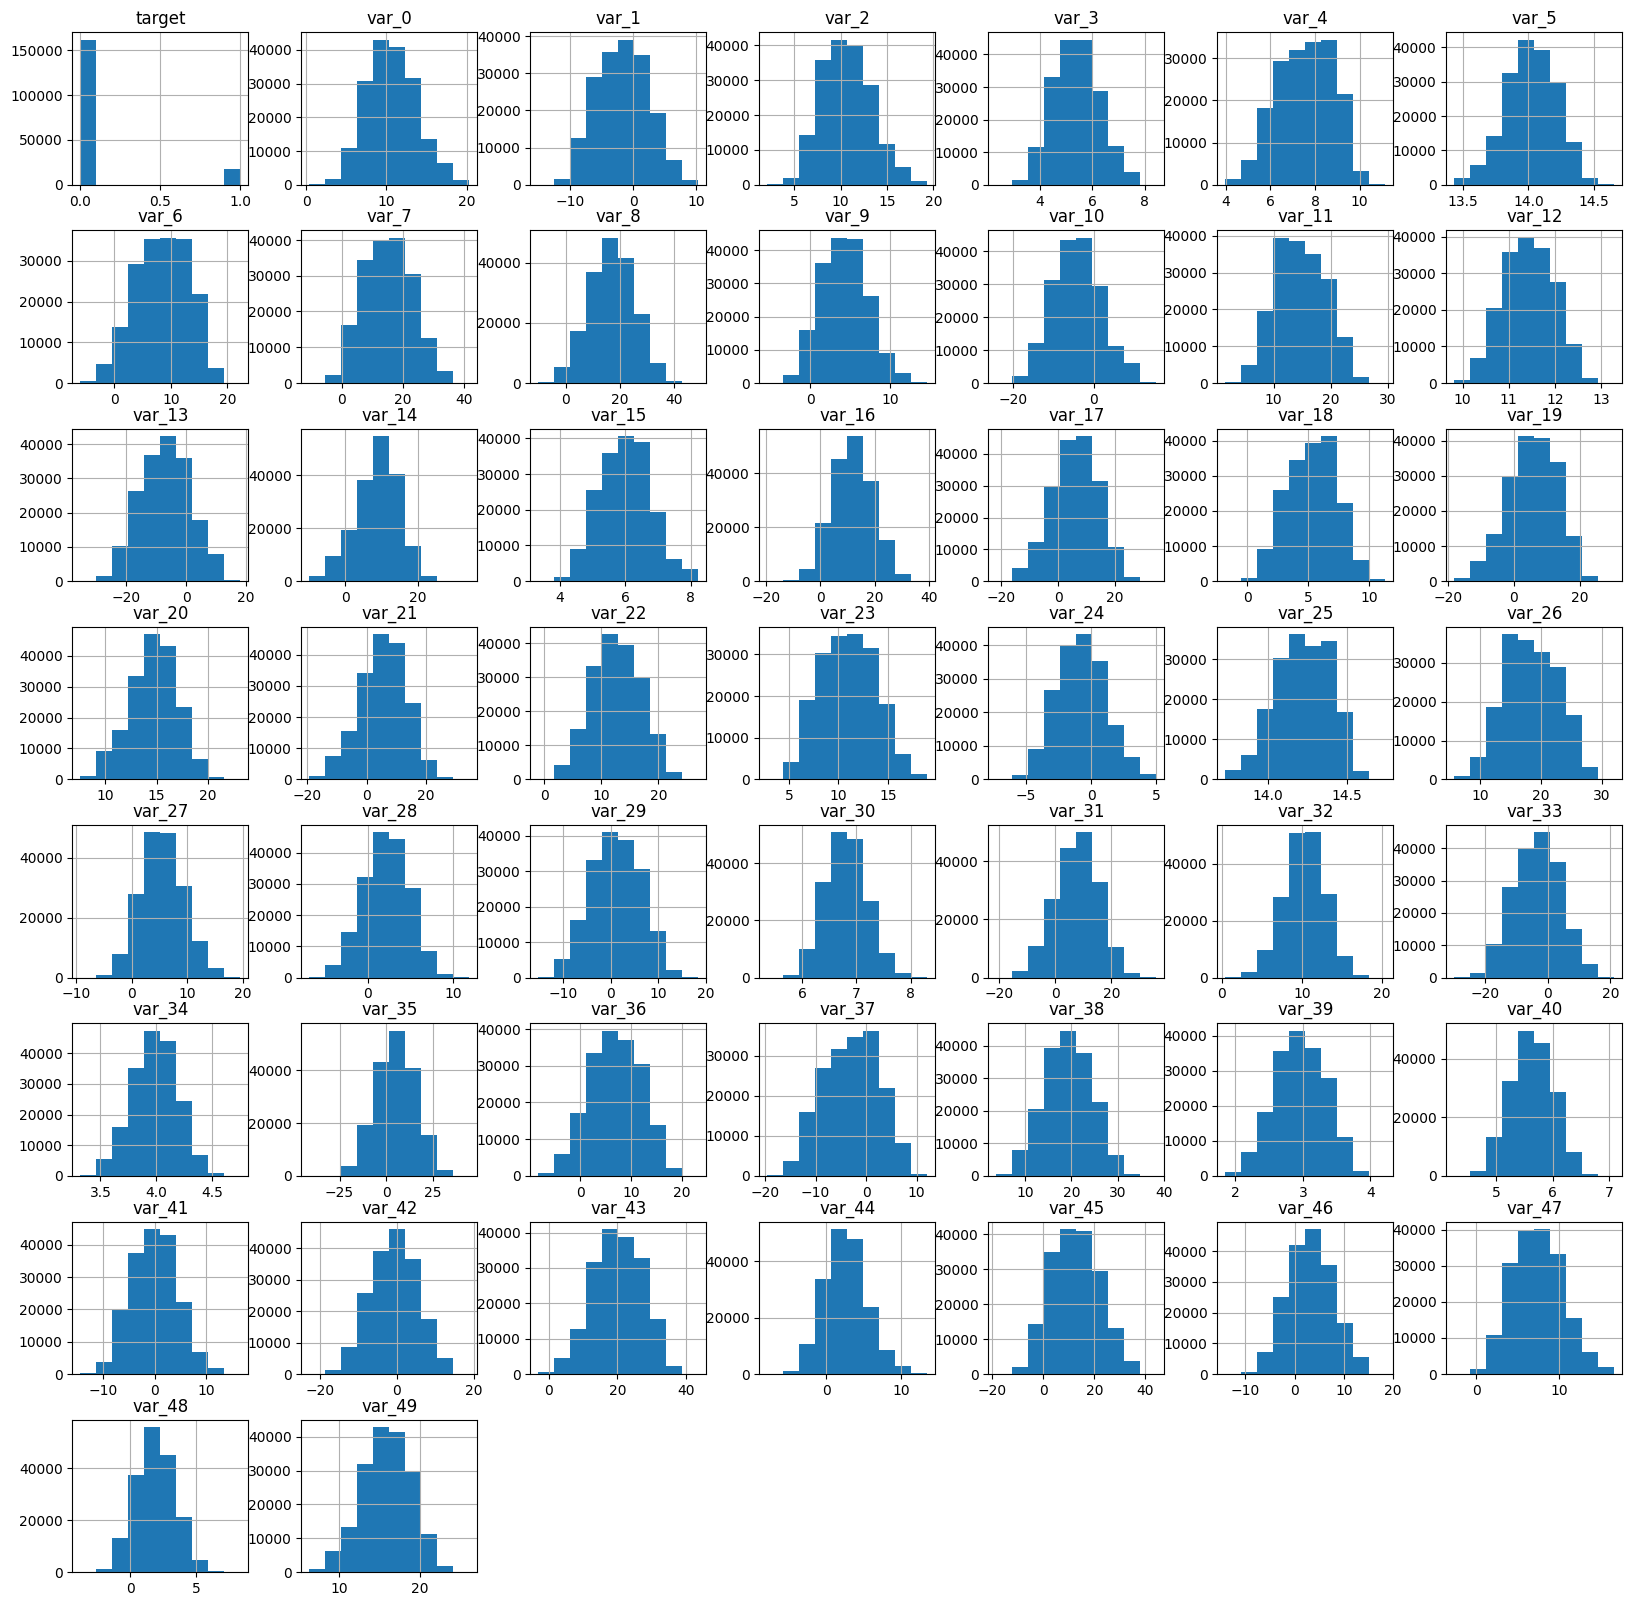

In [12]:
ctd.hist(figsize=(20, 20))
plt.show()

As we can see from this correlation matrix there aren't any significant correlations between our variables and our target which should indicate a Gaussian Naive Bayes model is the proper approach

In [13]:
rs = np.random.RandomState(0)

corr = ctd.corr()
corr.style.background_gradient(cmap='coolwarm')



,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
target,1.000000,0.052904,0.049916,0.055450,0.066924,-0.042073,-0.070015,-0.054375,0.044769,-0.057378,0.059227,0.063565,-0.045516,-0.052324,0.049072,-0.048623,0.062887,0.045281,-0.059906,0.048392,-0.057320,-0.080689,-0.040311,-0.046433,0.047569,0.059306,-0.047005,-0.050278,0.064868,-0.049551,-0.041987,0.052457,-0.073296,-0.063871,0.040520,-0.053733,-0.048198,-0.045513,0.040147,-0.055704,-0.057373,-0.050049,0.047948,0.041593,-0.061291,0.051110,0.047543,0.056902,0.045506,-0.042765,-0.051718
var_0,0.052904,1.000000,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,0.006102,-0.003080,-0.003419,0.006984,-0.003111,-0.000807,0.002762,-0.007308,0.003033,-0.003159,-0.007543,-0.000473,0.000999,0.002101,0.004061,-0.003717,-0.004076,0.006209,-0.000320,-0.000785,0.002141,-0.006605,0.000216,0.001071,-0.001549,-0.003448,-0.002529,-0.000680,-0.002785,-0.008580,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,0.049916,-0.002155,1.000000,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,0.004161,0.000955,-0.003251,0.001400,-0.005702,0.004442,0.002061,-0.003249,0.002386,-0.009469,-0.002229,-0.003555,0.000353,0.003639,0.004988,-0.001364,-0.000936,0.002923,-0.007531,-0.003454,0.002295,0.001009,-0.004563,0.002160,-0.001535,-0.003538,0.000531,0.003900,0.002074,-0.007379,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.055450,0.006632,0.005644,1.000000,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,0.006676,0.001006,-0.006361,0.000502,0.001173,0.000238,-0.002321,-0.008054,0.003295,-0.008065,-0.003277,-0.004516,-0.001183,-0.002632,0.005903,-0.000660,-0.000789,0.004149,-0.002385,-0.003774,0.000987,-0.002583,-0.003880,0.001614,-0.000990,-0.005730,-0.005019,-0.000033,-0.003032,-0.008062,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.066924,0.007155,0.002640,0.000679,1.000000,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,0.003590,0.000116,-0.003659,0.000999,-0.006827,0.003167,0.001771,-0.003353,0.005542,-0.008879,-0.003882,-0.005799,-0.004269,0.001711,0.005080,-0.002887,-0.001757,0.003192,-0.004857,-0.000245,0.002256,-0.003911,-0.001359,-0.004274,-0.006517,-0.002966,-0.003190,0.001802,0.001561,-0.003894,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.042073,-0.002247,-0.000408,-0.001293,-0.006768,1.000000,0.000845,0.000210,-0.001267,0.000962,-0.005332,-0.003446,0.003206,0.003278,-0.000803,0.001561,-0.001129,-0.003054,-0.000039,-0.002726,0.002086,0.000842,0.001610,0.001980,-0.007927,-0.003609,0.004553,0.002389,-0.002513,0.001646,0.002574,-0.002446,0.000657,-0.000499,-0.002492,0.004187,0.002901,0.002981,0.001161,0.004357,0.004569,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484
var_5,-0.070015,-0.003147,-0.002629,-0.002718,-0.002568,0.000845,1.000000,0.004778,0.000110,0.005587,-0.004708,-0.006633,0.008232,0.003767,-0.004156,-0.001322,-0.004501,-0.000761,0.005801,-0.005806,0.007575,0.005668,0.002973,0.006521,-0.003263,-0.009386,0.003363,0.005223,-0.004910,0.002953,0.002366,-0.003349,0.004910,0.008401,0.000237,0.006401,0.003790,0.002574,-0.002633,0.004442,0.007981,0.007054,-0.000356,-0.006139,0.004441,-0.005371,-0.002999,0.001721,-0.004525,0.003204,0.008009
var_6,-0.054375,-0.001717,-0.001234,-0.009171,-0.005282,0.000210,0.004778,1.000000,0.001922,0.001879,0.000293,-0.007201,0.002331,0.005578,-0.004100,0.007995,-0.000941,-0.004249,0.001999,-0.003728,0.003756,0.00550

Here we are looking at the correlation between all our variables just in reference to our target variable. Using absolute value since either positive or negative correlation doesn't give us any additional information here, all that matters is the relative correlation. The most correlated variable (var_20) is only 8% correlated to our target, and our least correlated is 4% correlated.

In [14]:
target_correlation = corr.iloc[0]

target_correlation.abs().sort_values(ascending = False)

,target
target,1.000000
var_20,0.080689
var_31,0.073296
var_5,0.070015
var_3,0.066924
var_27,0.064868
var_32,0.063871
var_10,0.063565
var_15,0.062887
var_43,0.061291


# Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.

1. Divide the two data frames you created in step #10 into training and testing subsets.

1. Train the model using the training subset of the dataset.

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



Here we're making a copy of our Dataframe excluding our target variable, aka the "predictors"

In [15]:
predictors = ctd.drop("target", axis = 1, inplace = False)
predictors
X = predictors.copy()
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.747,14.0137,0.5745,4.284,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.356
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.769,-7.0927,-5.8234,25.682,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.245,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.343,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,8.9112,-4.49,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,3.6973,...,5.9355,5.1764,-5.4817,20.739,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,8.2722,7.1923,16.73,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,3.2069,...,5.355,-1.5556,7.3839,9.9193,5.086,28.0185,7.4145,4.2814,2.5575,15.3969
179997,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,3.34,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,8.4894,0.7048,11.1518,4.637,8.1321,14.2921,6.9582,20.4504,29.9869,3.7526,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.676


Here we have a DataSeries showing our variables at our Target

In [16]:
target = ctd[['target']]
y = target
print(y)
y.sum()



        target
0            0
1            0
2            0
3            0
4            0
...        ...
179995       0
179996       0
179997       0
179998       0
179999       0

[180000 rows x 1 columns]


,0
target,18040


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of our model is: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of our model is: 0.9125


Our confusion matrix shows our model is very skewed towards predicting if a customer WON'T make a purchase. This is due to the disproportionate amount of data from people who made a purchase versus not. This unfortunately is not what we are hoping to predict accurately.

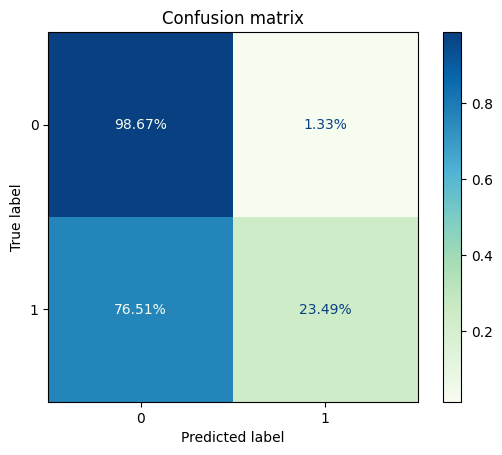

In [18]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

In [20]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """
numLoops = 100
accuracy_scores = np.zeros(numLoops)
for _ in range(0, numLoops) :
    X_train, X_test, y_train, y_test = model_selection. train_test_split(X,y,test_size=0.2)
    accuracy_scores [_] = metrics.accuracy_score (y_test, y_pred)
accuracy_scores.mean()

0.8717805555555554

Our models generated with different testing/training datasets are fairly precise as seen by the histograms x-scale, but only about 87% accurate. Compared to training the model one time we were 4% less accurate which is significant considering the amount of data points.

<function matplotlib.pyplot.show(close=None, block=None)>

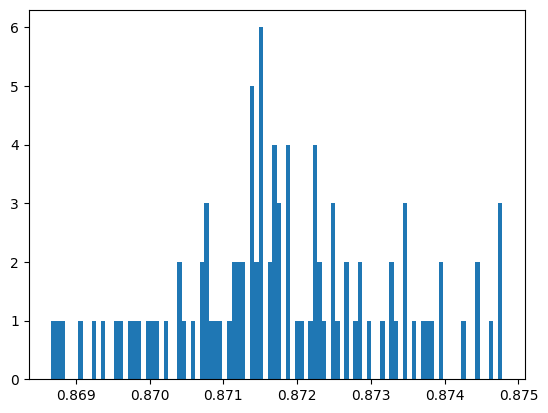

In [21]:
plt.hist(accuracy_scores, bins = 100)
plt.show

Ok now we need to work on evening out our dataframe to train our model. Although accuracy overall will go down, our accuracy of predicting someone making a purchase hopefully will increase.

Splitting our dataframe by whether a customer made a purchase or not

In [22]:
df_success = ctd[ctd["target"] == 1].copy()
df_nonpurchase = ctd[ctd["target"] == 0].copy()

We have 161,960 rows where someone didn't make a purchase and 18,040 rows where they did.

In [23]:
target.value_counts()

,count
target,
0,161960
1,18040


In [24]:
df_success

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.575,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.661,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.671,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.255,-7.2104,19.7545,6.319,11.941,4.6648,6.4227,3.4025,15.134
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.648,24.2658,33.3687,...,5.0565,11.9429,0.314,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179949,1,8.002,-0.6347,10.4115,6.6628,7.4319,14.1266,3.2978,23.4884,18.9512,...,5.0568,1.4224,-6.105,32.4652,6.0889,16.321,7.9024,10.2831,2.3823,13.7123
179956,1,12.8143,1.7022,12.5143,5.1252,5.9459,14.0384,1.984,16.6534,21.4191,...,5.5592,6.6583,-3.3179,18.3914,5.4363,12.9044,1.3307,9.1192,0.8223,16.8015
179964,1,10.7885,-2.7318,9.9486,5.4815,5.8853,13.6646,0.6277,12.3875,-0.1087,...,5.0744,0.9305,4.2118,10.3895,6.5844,33.9682,0.9674,8.2839,1.4019,15.1976
179968,1,7.1795,-1.8935,13.6706,4.5245,5.2765,13.9576,8.4353,26.0088,25.4347,...,4.9769,-6.4637,1.2472,27.3877,2.7317,-7.4564,2.5978,9.9902,0.9539,17.1436


Since we have 18,040 data points of customers purchasing something we will pull the same sample-size of our non-purchase data to hopefully train a better model.

In [25]:
df_nonpurchase_reduced = df_nonpurchase.sample(18040)
df_nonpurchase_reduced

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
14940,0,8.8828,-4.3292,7.5262,5.2436,8.7925,13.8019,4.4956,19.6727,2.5966,...,5.2698,-4.07,-5.4065,20.4449,8.662,2.0869,14.7989,7.1529,1.4489,17.0401
165031,0,8.7944,0.9587,9.9923,5.108,8.3084,14.1942,12.534,4.4823,16.5773,...,5.4714,2.2756,3.0902,18.308,9.386,7.5592,4.8811,11.2208,0.1114,15.847
26431,0,11.2656,-3.1138,11.8005,6.0685,7.6161,13.782,6.3671,30.8557,15.7648,...,5.478,-4.4094,-5.7616,16.176,3.3847,14.088,6.1013,12.4459,0.9516,10.4786
89298,0,10.7538,-4.3794,15.7511,5.3677,9.3785,14.0399,9.3834,3.89,34.3091,...,5.7346,2.208,1.5432,14.5635,1.9099,7.868,0.3349,4.2815,3.9614,14.5036
35046,0,10.7987,1.7165,5.635,5.16,7.9424,13.5987,4.5485,5.598,19.3633,...,5.9415,5.4679,5.4446,19.1576,3.0038,13.6764,3.6147,6.47,0.331,21.0855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65488,0,9.5475,-8.2055,12.2305,6.0155,6.1648,13.6927,4.9481,18.2952,9.4283,...,6.2737,-7.8072,2.282,8.4347,4.1709,3.5905,-1.1602,5.7889,3.4372,16.9229
76899,0,11.075,-2.9598,7.3505,4.7201,8.6399,14.3734,16.0824,15.6294,24.7281,...,5.1414,3.9314,1.0861,19.1608,-0.8154,4.9633,-3.2389,8.3282,2.2763,14.6761
59193,0,9.3532,-1.6341,13.959,4.0744,7.5989,13.903,6.5462,10.6569,22.6796,...,5.4401,3.5072,-4.9443,33.3968,-0.4312,9.7814,6.2143,8.1473,1.7768,17.7847
29808,0,10.1852,-2.4446,8.6148,5.5789,8.9188,13.9744,7.5655,23.7527,-0.8966,...,6.0896,10.6484,-7.9053,27.4822,7.4872,9.5466,4.8853,6.587,3.4242,15.8818


Here we are combining our two dataframes to train our new model on.

In [26]:
df_adjusted = pd.concat([df_nonpurchase_reduced, df_success], ignore_index = True)
df_adjusted

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.8828,-4.3292,7.5262,5.2436,8.7925,13.8019,4.4956,19.6727,2.5966,...,5.2698,-4.07,-5.4065,20.4449,8.662,2.0869,14.7989,7.1529,1.4489,17.0401
1,0,8.7944,0.9587,9.9923,5.108,8.3084,14.1942,12.534,4.4823,16.5773,...,5.4714,2.2756,3.0902,18.308,9.386,7.5592,4.8811,11.2208,0.1114,15.847
2,0,11.2656,-3.1138,11.8005,6.0685,7.6161,13.782,6.3671,30.8557,15.7648,...,5.478,-4.4094,-5.7616,16.176,3.3847,14.088,6.1013,12.4459,0.9516,10.4786
3,0,10.7538,-4.3794,15.7511,5.3677,9.3785,14.0399,9.3834,3.89,34.3091,...,5.7346,2.208,1.5432,14.5635,1.9099,7.868,0.3349,4.2815,3.9614,14.5036
4,0,10.7987,1.7165,5.635,5.16,7.9424,13.5987,4.5485,5.598,19.3633,...,5.9415,5.4679,5.4446,19.1576,3.0038,13.6764,3.6147,6.47,0.331,21.0855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36075,1,8.002,-0.6347,10.4115,6.6628,7.4319,14.1266,3.2978,23.4884,18.9512,...,5.0568,1.4224,-6.105,32.4652,6.0889,16.321,7.9024,10.2831,2.3823,13.7123
36076,1,12.8143,1.7022,12.5143,5.1252,5.9459,14.0384,1.984,16.6534,21.4191,...,5.5592,6.6583,-3.3179,18.3914,5.4363,12.9044,1.3307,9.1192,0.8223,16.8015
36077,1,10.7885,-2.7318,9.9486,5.4815,5.8853,13.6646,0.6277,12.3875,-0.1087,...,5.0744,0.9305,4.2118,10.3895,6.5844,33.9682,0.9674,8.2839,1.4019,15.1976
36078,1,7.1795,-1.8935,13.6706,4.5245,5.2765,13.9576,8.4353,26.0088,25.4347,...,4.9769,-6.4637,1.2472,27.3877,2.7317,-7.4564,2.5978,9.9902,0.9539,17.1436


In [27]:
X_adjusted = df_adjusted.drop("target", axis = 1, inplace = False)
A = X_adjusted # Dataframe excluding our target variable, also known as our predictors.


DataSeries showing our variables at our Target


In [28]:
y_adjusted = df_adjusted[['target']]
b = y_adjusted



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_adjusted, y_adjusted, test_size=0.2, random_state=100)

# Initialize the Gaussian Naive Bayes classifier
model_adjusted = GaussianNB()

# Train the model
model_adjusted.fit(X_train, y_train)
y_pred = model_adjusted.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of our model is: {accuracy}')

Accuracy of our model is: 0.7555432372505543


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our Accuracy is significantly lower overall (0.75 versus 0.87), but our model predicted whether a customer made a purchase much more effectively (73.64% versus 23.49%).

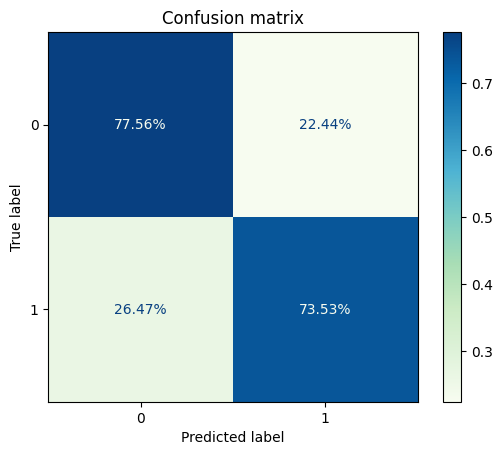

In [30]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model_adjusted,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

In [31]:
X_train.shape, y_train.shape

((28864, 50), (28864, 1))

In [32]:
numLoops2 = 100
accuracy_scores2 = np.zeros(numLoops2)
for i in range(0, numLoops2) :
    X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X_adjusted, y_adjusted,test_size=.2)
    accuracy_scores2 [i] = metrics.accuracy_score (y_test2, y_pred)
accuracy_scores2.mean()

0.5007317073170732

In [39]:
def cross_validate2(X_adjusted, y_adjusted, num_loops2):
  """Randomly splits X and y values into train/test groups (test size = 25%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """
numLoops2 = 100
accuracy_scores2 = np.zeros(numLoops2)
for i in range(0, numLoops2) :
    X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X_adjusted, y_adjusted,test_size=.2)
    accuracy_scores2 [i] = metrics.accuracy_score (y_test2, y_pred)
accuracy_scores2.mean()

0.49934728381374716

This accuracy score, as well as histogram is incorrect (49.9%) and should be closer to 75% as indicated by our confusion matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

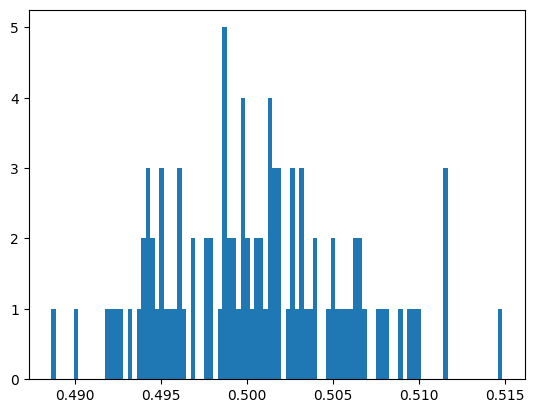

In [34]:
plt.hist(accuracy_scores2, bins = 100)
plt.show

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76      3627
         1.0       0.76      0.74      0.75      3589

    accuracy                           0.76      7216
   macro avg       0.76      0.76      0.76      7216
weighted avg       0.76      0.76      0.76      7216



# Data Visualization/Communication of Results

Unfortunately I ran into a bug I was unable to resolve for the last portion of the project, when running the cross validation for the second time, but I will pretend I stopped at the second confusion Matrix in order to give an analysis.

When using our entire dataframe we saw our model was about 87% accurate in predicting customers' purchase-behavior. 87% seems like a good model to use, but when it comes to an actual purchase being made; that model was only 23% accurate. This is possible because our subset of successful transactions is a much smaller proportion of the entire dataframe (around 10%).

When we adjusted our dataframe to balance our proportion of transactions versus not, we saw our accuracy decrease to around 75%. This looks bad at first glance, but keeping in mind our goal is to predict if a purchase will be made, the most important factor is if our model predicted a purchase more accurately. The significance of training a model that is 50% more accurate (73.5- 23%) at predicting if a customer will make a purchase far outweighs the 12% decrease in overall accuracy.







# Future exploration



It would be nice to understand how these variables were collected, and to see how this dataset compares to other transaction datasets ran through the same analytics.

Also we could try different modeling techniques like a random forest